In [30]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [31]:
df = pd.read_csv("dataset_comb.csv", header=0)

In [32]:
df.columns = ["Id","Area","MajorAxisLength","MinorAxisLength","Eccentricity","ConvexArea","EquivDiameter","Extent","Perimeter","Roundness","AspectRation","Class"]
X = df[["Id","Area","MajorAxisLength","MinorAxisLength","Eccentricity","ConvexArea","EquivDiameter","Extent","Perimeter","Roundness","AspectRation"]]
print(X.shape)
# X = np.array(X)
Y = df["Class"]
# Y = np.array(Y)
# print(Y)

(18185, 11)


In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def LogisticReg(x_train,x_test,y_train,y_test):
  logisticRegr = LogisticRegression(solver='liblinear')
  logisticRegr.fit(x_train, y_train)
  pred_values=logisticRegr.predict(x_test)
  acc = accuracy_score(pred_values ,y_test)
  return acc

def Percept(x_train,x_test,y_train,y_test):
  model = Perceptron(random_state=0)
  model.fit(x_train,y_train)
  pred_values = model.predict(x_test)
  acc = accuracy_score(pred_values ,y_test)
  return acc

def LinearDiscr(x_train,x_test,y_train,y_test):
  model = LinearDiscriminantAnalysis()
  model.fit(x_train,y_train)
  pred_values = model.predict(x_test)
  acc = accuracy_score(pred_values ,y_test)
  return acc

def NaiveBayes(x_train,x_test,y_train,y_test):
  model = GaussianNB()
  model.fit(x_train,y_train)
  pred_values = model.predict(x_test)
  acc = accuracy_score(pred_values ,y_test)
  return acc

def ANN(x_train,x_test,y_train,y_test):
  model = MLPClassifier(max_iter=1000000)
  model.fit(x_train,y_train)
  pred_values = model.predict(x_test)
  acc = accuracy_score(pred_values ,y_test)
  return acc

def SVM(x_train,x_test,y_train,y_test):
  model = SVC(kernel='linear')
  model.fit(x_train,y_train)
  pred_values = model.predict(x_test)
  acc = accuracy_score(pred_values ,y_test)
  return acc



folds = StratifiedKFold(n_splits=7)

scores_logistic = []
scores_svm = []
scores_lda = []
scores_lp = []
scores_nb = []
scores_ann = []
for train_index, test_index in folds.split(X,Y):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index],Y[train_index],Y[test_index] 
    scores_logistic.append(LogisticReg(X_train, X_test, y_train, y_test))
    scores_lp.append(Percept(X_train, X_test, y_train, y_test))
    scores_lda.append(LinearDiscr(X_train, X_test, y_train, y_test))
    scores_nb.append(NaiveBayes(X_train, X_test, y_train, y_test))
    scores_ann.append(ANN(X_train, X_test, y_train, y_test))
    scores_svm.append(SVM(X_train, X_test, y_train, y_test))  

In [41]:
data = [scores_logistic,scores_svm,scores_lda,scores_lp,scores_nb,scores_ann]

print('The average accuracy for LR is:',sum(scores_logistic)/len(scores_logistic)*100)
print('The average accuracy for SVM is:',sum(scores_svm)/len(scores_svm)*100)
print('The average accuracy for LDA is:',sum(scores_lda)/len(scores_lda)*100)
print('The average accuracy for LP is:',sum(scores_lp)/len(scores_lp)*100)
print('The average accuracy for NB is:',sum(scores_nb)/len(scores_nb)*100)
print('The average accuracy for ANN is:',sum(scores_ann)/len(scores_ann)*100)

print(scores_logistic)
print(scores_svm)
print(scores_lda)
print(scores_lp)
print(scores_nb)
print(scores_ann)



The average accuracy for LR is:%d % 97.89397803156795
The average accuracy for SVM is: 98.47135158913449
The average accuracy for LDA is: 99.02672385351369
The average accuracy for LP is: 95.52952609117077
The average accuracy for NB is: 97.992756236724
The average accuracy for ANN is: 95.00700649401273
[0.8537336412625096, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9988448209472468]
[0.8929946112394149, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9318706697459584, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.6874518860662048, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9996149403157489]
[0.9491916859122402, 0.9865280985373364, 0.9911470361816782, 0.9923017705927637, 0.9888375673595073, 0.9888375673595073, 0.9626492106276473]
[0.6978444957659738, 1.0, 0.9992301770592764, 0.9795996920708238, 0.9996150885296382, 1.0, 0.974201001155179]


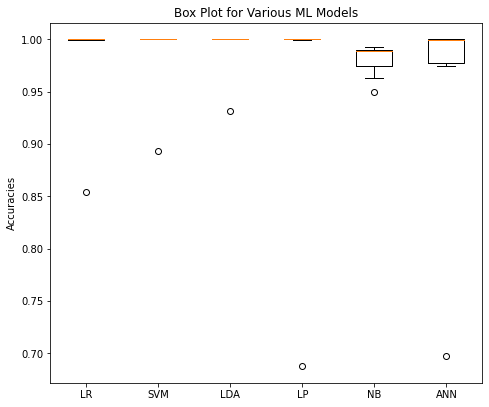

In [35]:
fig = plt.figure(figsize =(6, 5))
ax = fig.add_axes([0, 0, 1, 1])
plt.boxplot(data)
plt.title("Box Plot for Various ML Models")
plt.ylabel('Accuracies')
plt.xticks([1,2,3,4,5,6], ['LR', 'SVM', 'LDA', 'LP', 'NB', 'ANN'])
plt.show()

In [36]:


# for train_index, test_index in folds.split(X,Y):
#     X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index],Y[train_index],Y[test_index]
#     scores_logistic.append(get_score(LogisticRegression(solver='liblinear'),X_train, X_test, y_train, y_test))  
#     scores_logistic.append(LogisticReg(X_train, X_test, y_train, y_test))
#     scores_svm.append(get_score(SVC(kernel='linear'), X_train, X_test, y_train, y_test))
#     scores_lda.append(get_score(LinearDiscriminantAnalysis(), X_train, X_test, y_train, y_test))
#     scores_lp.append(get_score(Perceptron(tol=1e-3, random_state=0), X_train, X_test, y_train, y_test))
#     scores_nb.append(get_score(GaussianNB(), X_train, X_test, y_train, y_test))
#     scores_ann.append(get_score(MLPClassifier(max_iter=1000000), X_train, X_test, y_train, y_test))